In [84]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 50

import src

train_models = src.shapenet.get_shapenet_data("val")

In [92]:
nb_points = 100000
nb_patches=128
nb_points_per_patches = 1024

In [93]:
#path = np.random.choice(train_models)
path = 'data/ShapeNetCore.v2/02691156/973211dfe6bcc4ae90b1d6deb98feec6/models/model_normalized.obj'
cloud = src.shapenet.sample_points(path , nb=nb_points)
extractor = src.dataset.PPFPatchExtractor(nb_patches=nb_patches, nb_points=nb_points_per_patches)
centers, centers_normals, patches, patches_normals, centers_idx = extractor.make_patches(cloud)
M = extractor.compute_M(centers)

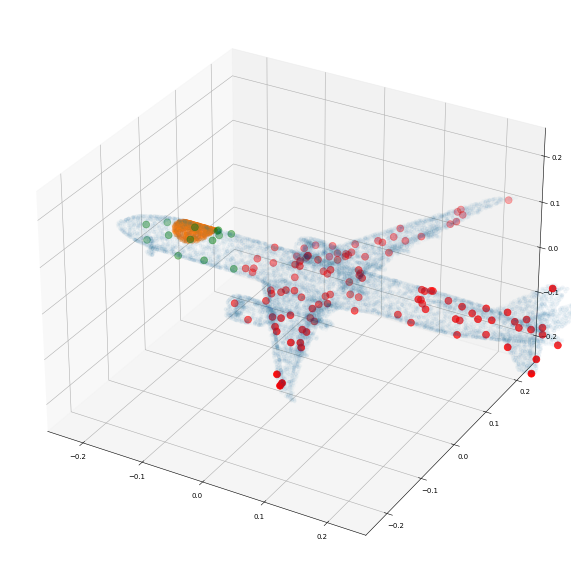

In [99]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
lim = (-0.25,0.25)

n = 20000
xs = cloud[0][:n,2]
ys = cloud[0][:n,0]
zs = cloud[0][:n,1]

center_idx = np.random.randint(len(centers))
colors = np.array(["red", "green"])[M[center_idx].astype(np.int)]

ax.set_xlim(lim)
ax.set_ylim(lim) 
ax.set_zlim(lim) 
ax.scatter(xs, ys, zs, alpha=0.02)

xs = centers[:,2]
ys = centers[:,0]
zs = centers[:,1]
ax.scatter(xs, ys, zs, s=100, color=colors)

xs = centers[center_idx,2]
ys = centers[center_idx,0]
zs = centers[center_idx,1]
ax.scatter(xs, ys, zs, s=200, color="blue")


xs = patches[center_idx,:,2]
ys = patches[center_idx,:,0]
zs = patches[center_idx,:,1]
ax.scatter(xs, ys, zs, alpha=0.2)